PEC2: Visualización de datos con tres técnicas diferentes: Heatmap, Marimakko chart y Sparklines

Autor: Juan Antonio Gonzalez Ballester

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


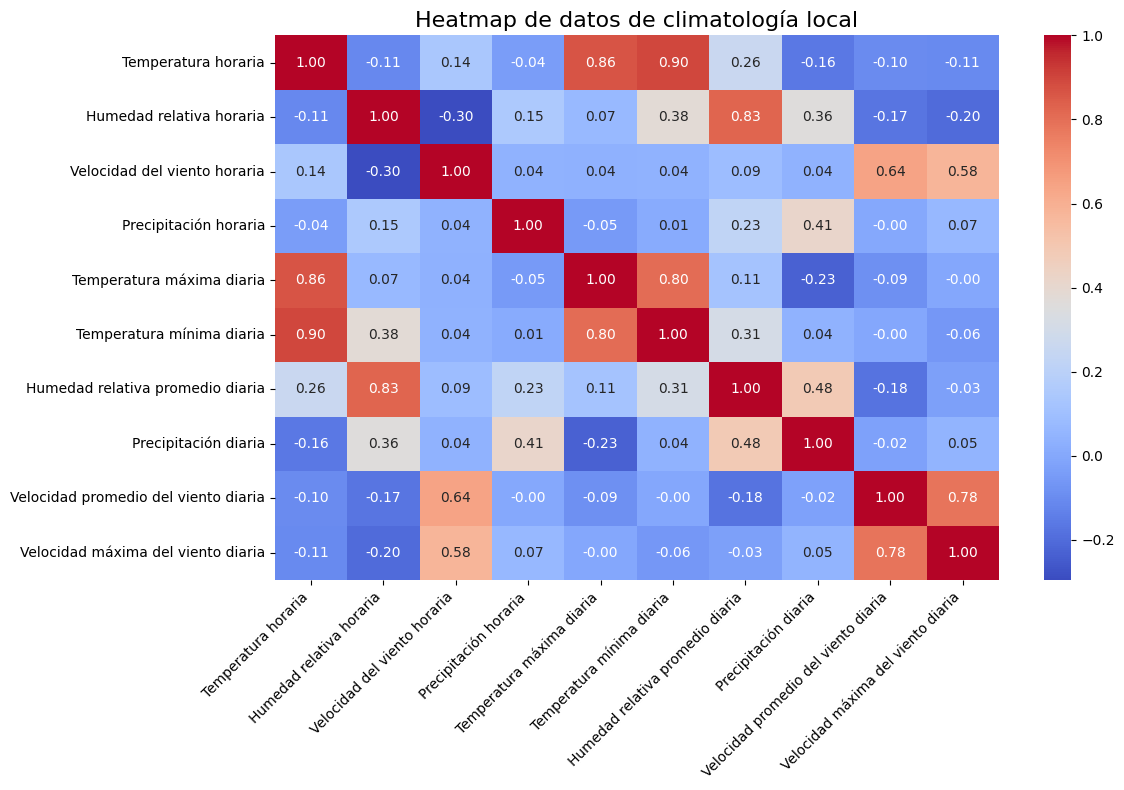

In [39]:
#Heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo
file_path = '/content/drive/My Drive/Weather_Data.csv'

# Cargar el dataset
dataset = pd.read_csv(file_path)

# Renombrar columnas para que sean más claras en español
column_mapping = {
    "HOURLYDRYBULBTEMPC": "Temperatura horaria",
    "HOURLYRelativeHumidity": "Humedad relativa horaria",
    "HOURLYWindSpeed": "Velocidad del viento horaria",
    "HOURLYPrecip": "Precipitación horaria",
    "DAILYMaximumDryBulbTemp": "Temperatura máxima diaria",
    "DAILYMinimumDryBulbTemp": "Temperatura mínima diaria",
    "DAILYAverageRelativeHumidity": "Humedad relativa promedio diaria",
    "DAILYPrecip": "Precipitación diaria",
    "DAILYAverageWindSpeed": "Velocidad promedio del viento diaria",
    "DAILYPeakWindSpeed": "Velocidad máxima del viento diaria"
}

dataset.rename(columns=column_mapping, inplace=True)

# Seleccionar columnas relevantes con nombres en español
numerical_columns = list(column_mapping.values())  # Columnas traducidas

# Correlación entre las columnas numéricas
correlation_matrix = dataset[numerical_columns].corr()

# Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de datos de climatología local", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Si no en la imagen descargada no se ven las letras

# Guardar la imagen como un archivo JPEG para subir a internet
plt.savefig("heatmap.jpeg", format="jpeg")

# Mostrar el heatmap
plt.show()

In [34]:
# Marimekko chart

import plotly.express as px

# Ruta al archivo
file_path = '/content/drive/My Drive/T1.csv'

# Cargar el dataset
dataset = pd.read_csv(file_path, skiprows=1)

# Filtrar columnas relevantes: Country Name, Indicator Name, y años (por simplicidad, promediaremos los valores de los años)
columns_of_interest = ["Country Name", "Indicator Name"] + [str(year) for year in range(1960, 2022)]
data_filtered = dataset[columns_of_interest]

# Calcular promedio por país e indicador (para reducir la complejidad)
data_filtered = data_filtered.copy()  # Crea una copia explícita para evitar conflictos
data_filtered["Average Value"] = data_filtered.loc[:, "1960":"2021"].mean(axis=1)


# Filtrar columnas necesarias para el gráfico
data_marimekko = data_filtered[["Country Name", "Indicator Name", "Average Value"]]

# Crear el Marimekko Chart
fig = px.treemap(
    data_marimekko,
    path=["Indicator Name", "Country Name"],  # Estructura jerárquica (primero el Indicador, luego el País)
    values="Average Value",  # Tamaño basado en el valor promedio
    title="Marimekko Chart: Mortalidad infantil media por país",
    color="Average Value",  # Colorear por valor promedio
    color_continuous_scale="Viridis"
)
# Guardar la imagen como un archivo html para subir a internet y que siga siendo dinámica
fig.write_html("Marimekko_chart.html")

# Mostrar el gráfico
fig.show()


<ipython-input-44-daecab1ed4e9>:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



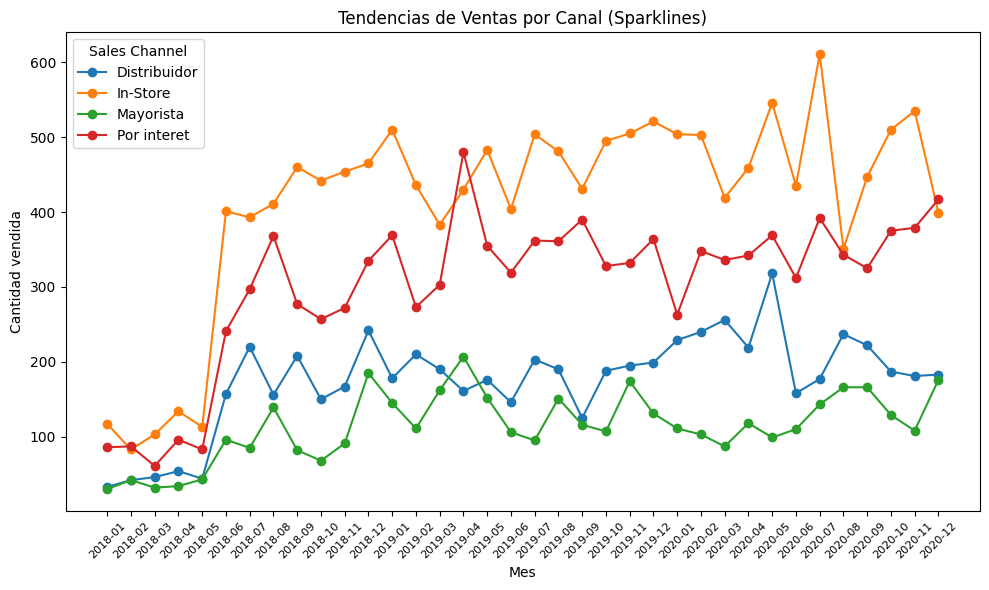

In [44]:
# Sparklines

# Cargar el dataset
file_path = '/content/drive/My Drive/US_Regional_Sales_Data.csv'
dataset = pd.read_csv(file_path)

# Convertir las fechas a formato datetime
dataset["OrderDate"] = pd.to_datetime(dataset["OrderDate"])

# Renombrar los valores de la columna Sales Channel
channel_mapping = {
    "Distributor": "Distribuidor",
    "In-store": "En tienda",
    "Online": "Por interet",
    "Wholesale": "Mayorista"
}
dataset["Sales Channel"] = dataset["Sales Channel"].replace(channel_mapping)

# Crear una nueva columna para el mes y el año
dataset["YearMonth"] = dataset["OrderDate"].dt.to_period("M")

# Agrupar por Sales Channel y YearMonth, sumando las cantidades ordenadas (Order Quantity)
sales_trends = dataset.groupby(["Sales Channel", "YearMonth"])["Order Quantity"].sum().unstack(level=0)

# Crear Sparklines (gráficos por cada canal de ventas)
plt.figure(figsize=(10, 6))
for i, column in enumerate(sales_trends.columns):
    plt.plot(sales_trends.index.astype(str), sales_trends[column], label=column, marker="o")
    plt.title("Tendencias de Ventas por Canal (Sparklines)")
    plt.ylabel("Cantidad vendida")
    plt.xlabel("Mes")
    plt.xticks(rotation=45, fontsize=8)

plt.legend(title="Sales Channel", loc="upper left")
plt.tight_layout()

# Guardar la imagen como un archivo JPEG para subir a internet
plt.savefig("sparklines.jpeg", format="jpeg")

# Mostrar el gráfico
plt.show()
